In [33]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.naive_bayes as NB
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

In [34]:
# Load & Show some rows of dataset
dataset = pd.read_csv('diabetes_prediction_dataset.csv')
dataset.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [35]:
# Create an instance of the encoder & fit it
label_encoder = preprocessing.LabelEncoder()
dataset['smoking_history'] = label_encoder.fit_transform(dataset['smoking_history'])
label_encoder.fit(dataset['gender'])
dataset['gender'] = label_encoder.fit_transform(dataset['gender'])

# Apply normalization techniques [0, 1]
for column in ['age','bmi', 'HbA1c_level', 'blood_glucose_level', 'smoking_history']:
    dataset[column] = (dataset[column] - dataset[column].min()) / (dataset[column].max() - dataset[column].min())

# Show some rows of dataset after encoding & normalization
dataset.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.000000,0,1,0.8,0.177171,0.563636,0.272727,0
1,0,0.674675,0,0,0.0,0.202031,0.563636,0.000000,0
2,1,0.349349,0,0,0.8,0.202031,0.400000,0.354545,0
3,0,0.449449,0,0,0.2,0.156863,0.272727,0.340909,0
4,1,0.949950,1,1,0.2,0.118231,0.236364,0.340909,0
5,0,0.249249,0,0,0.8,0.202031,0.563636,0.022727,0
6,0,0.549550,0,0,0.8,0.108543,0.545455,0.545455,1
7,0,0.987487,0,0,0.0,0.161648,0.400000,0.022727,0
8,1,0.524525,0,0,0.8,0.275794,0.236364,0.295455,0
9,0,0.399399,0,0,0.8,0.202031,0.272727,0.090909,0


In [36]:
# Separate features & targets
y_data = dataset['diabetes']
x_data = dataset.drop(['diabetes'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

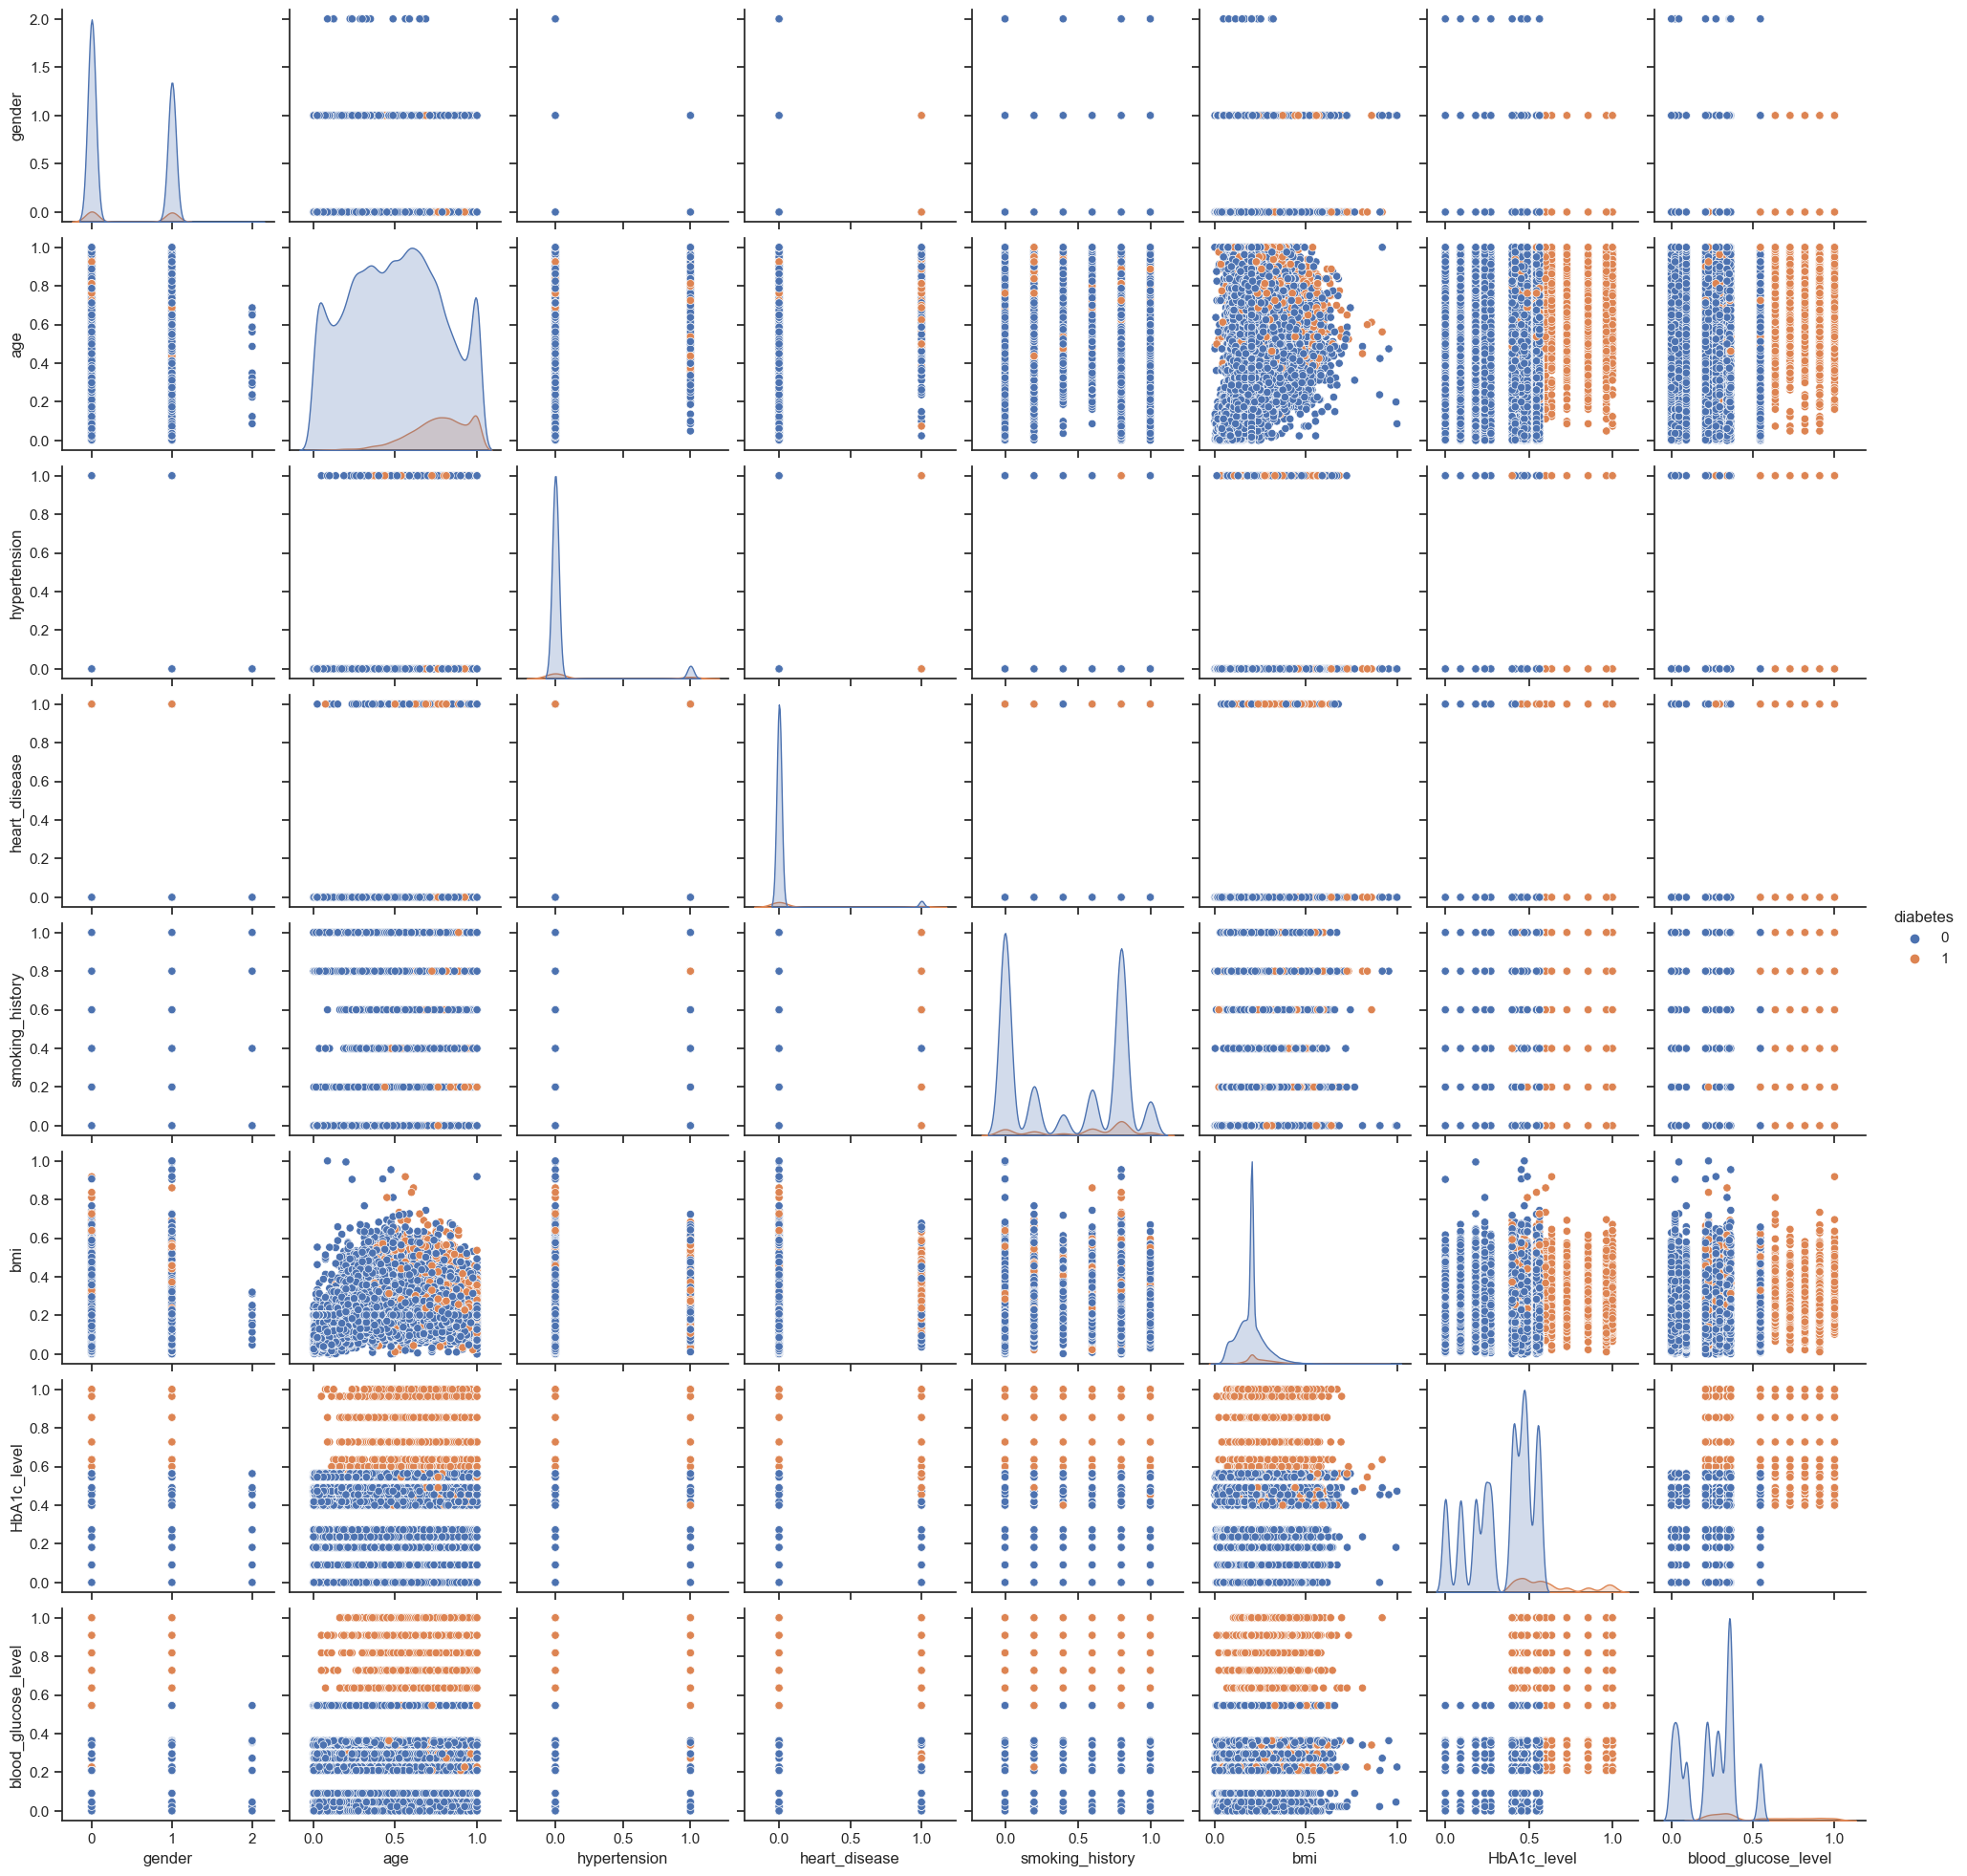

In [37]:
# Plot the scatter
sns.set(style="ticks")
sns.pairplot(dataset, hue="diabetes")
plt.show()

Accuracy of each validation: 
[0.90614286 0.90042857 0.90514286 0.90271429 0.903      0.90485714
 0.90671429 0.90357143 0.90314286 0.90442857]

Total accuracy: 
	 0.9059666666666667

[[25536  1917]
 [  904  1643]]
True Negatives(TN) =  25536
True Positives(TP) =  1643
False Positives(FP) =  1917
False Negatives(FN) =  904


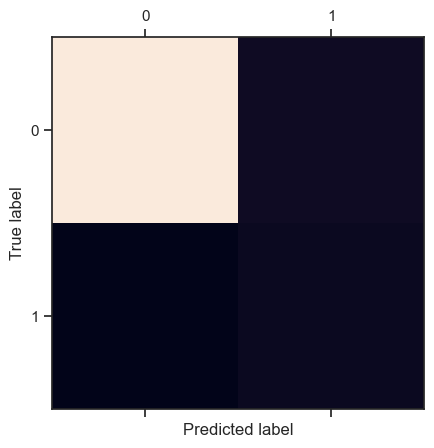

In [38]:
# Fit Gaussian Naive Bayes model
Gaussian_naive_bayes = NB.GaussianNB()
classifier = Gaussian_naive_bayes.fit(x_train, y_train)
score = cross_val_score(classifier, x_train, y_train, cv = 10)
print(f"Accuracy of each validation: \n{score}\n")

# Prediction on test data
predict_guassian = Gaussian_naive_bayes.predict(x_test)
accuracy = accuracy_score(y_test, predict_guassian)
print(f"Total accuracy: \n\t {accuracy}\n")

# Calc. & print Confusion Matrix
ConfusionMatrix = confusion_matrix(y_test, predict_guassian)
print(ConfusionMatrix)
print('True Negatives(TN) = ', ConfusionMatrix[0,0])
print('True Positives(TP) = ', ConfusionMatrix[1,1])
print('False Positives(FP) = ', ConfusionMatrix[0,1])
print('False Negatives(FN) = ', ConfusionMatrix[1,0])

plt.matshow(ConfusionMatrix)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Total accuracy: 
	 0.9039428571428572

[[59403  4644]
 [ 2080  3873]]
True Negatives(TN) =  59403
True Positives(TP) =  3873
False Positives(FP) =  4644
False Negatives(FN) =  2080


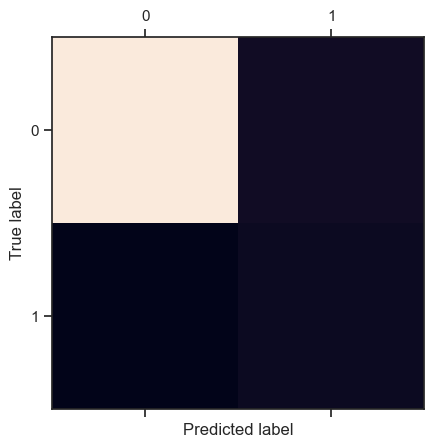

In [39]:
# Prediction on train data
predict_guassian = Gaussian_naive_bayes.predict(x_train)
accuracy = accuracy_score(y_train, predict_guassian)
print(f"Total accuracy: \n\t {accuracy}\n")

# Calc. & print Confusion Matrix
ConfusionMatrix = confusion_matrix(y_train, predict_guassian)
print(ConfusionMatrix)
print('True Negatives(TN) = ', ConfusionMatrix[0,0])
print('True Positives(TP) = ', ConfusionMatrix[1,1])
print('False Positives(FP) = ', ConfusionMatrix[0,1])
print('False Negatives(FN) = ', ConfusionMatrix[1,0])

plt.matshow(ConfusionMatrix)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()